In [8]:
import pandas as pd
import numpy as np
arr =np.array([1,2,3,4,5,6],ndmin=2)
print(arr)

[[1 2 3 4 5 6]]


In [9]:
import numpy as np
np.sort(np.array([[1,5,2],[6,1,2]]))

array([[1, 2, 5],
       [1, 2, 6]])

In [20]:
data = { "Red":pd.DataFrame(np.random.randn(4,2)),"Blue":pd.DataFrame(np.random.randn(4,3))}
df = pd.Panel(data)
df
df2 = pd.Series(np.array([1,2,3,4]))
df2

0    1
1    2
2    3
3    4
dtype: int32

In [51]:
frame = pd.DataFrame(np.random.randn(4,3),index =(1,2,4,7),columns=['A','B','C'])
# frame.reindex([1,2,3,4,5,6,7])
frame = frame.reindex([1,2,3,4,5,6,7])
frame
frame['B'].isnull()
# frame.dropna()
frame
from numpy import NaN
frame.replace({NaN:0.0})
frame.fillna(method ='pad')
frame.fillna(method ='backfill')

,A,B,C
1,0.868450,-0.096606,2.407957
2,-1.167253,0.007754,0.272844
3,-1.719382,-0.287150,-1.257357
4,-1.719382,-0.287150,-1.257357
5,-0.430957,1.099259,-2.021807
6,-0.430957,1.099259,-2.021807
7,-0.430957,1.099259,-2.021807


In [60]:
df = pd.read_csv('bai1.csv')
df
print(df.to_json(orient="records",lines=True))

{"Unnamed: 0":0,"age":12,"name":"truc"}
{"Unnamed: 0":1,"age":21,"name":"thanh"}
{"Unnamed: 0":2,"age":23,"name":"ngoc"}


In [73]:
from sqlalchemy import create_engine
import pandas as pd
from pandas.io import sql 
df = pd.read_csv('bai1.csv')
engine = create_engine('sqlite:///:memory:')
df.to_sql('data',engine)
# sql.execute('insert into data values(?,?,?,?)',engine,params=[(4,4,40,'trucngu')])
sql.execute('delete from data where age =(?)',engine,params=[(40)])
print(pd.read_sql_query('select * from data',engine))

   index  Unnamed: 0  age   name
0      0           0   12   truc
1      1           1   21  thanh
2      2           2   23   ngoc


In [82]:
from pymongo import MongoClient
from pprint import pprint
client = MongoClient() # choose client
db =client.test #connect to database
student = db.student
student_record ={
    'name':'truc',
    'age':1
}
result = student.insert_one(student_record)
pprint(student.find_one({'age':1}))

ServerSelectionTimeoutError: localhost:27017: [WinError 10061] No connection could be made because the target machine actively refused it

In [101]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
ps = PorterStemmer()
words=['game','gaming','gamer','games']
for word in words:
    print(f'{word}: {ps.stem(word)}')
# ps.stem('wrote')
sentence='I am enjoying writing this tutorial; I love to write and I have written 266 words so far. I wrote more than you did; I am a writer.'
wordss =word_tokenize(sentence)
for w in wordss:
    print(f"{w}:{ps.stem(w)}")
from nltk.stem import WordNetLemmatizer
lemmatize = WordNetLemmatizer()
# nltk.dowload('wordnet')
lemmatize.lemmatize('players')
lemmatize.lemmatize('better',pos='a')

game: game
gaming: game
gamer: gamer
games: game
I:I
am:am
enjoying:enjoy
writing:write
this:thi
tutorial:tutori
;:;
I:I
love:love
to:to
write:write
and:and
I:I
have:have
written:written
266:266
words:word
so:so
far:far
.:.
I:I
wrote:wrote
more:more
than:than
you:you
did:did
;:;
I:I
am:am
a:a
writer:writer
.:.


'good'

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

In [137]:
import statistics as st
nums= [1,2,3,4,5,6,7,7,7,9]
number =[1,4,5,6]
st.mean(nums)
from fractions import Fraction as fr
print(st.mean((fr(3,4),fr(5,7),fr(2,1)))) # giá trị trung bình
print(st.mode(nums)) # value common most
print(st.median(nums)) # value ở khoảng giữa ( nếu length lẻ=> lấy middle,còn lếu length chẵn => (2 value middle + lại)/2))
print(st.harmonic_mean([2,4,9.7,6])) # ham dieu hoa ( 3/(1/a+1/b+1/c))
print(st.median_low(nums))
print(st.median_high(nums))
print(st.median_grouped(nums, interval=2))
print(st.variance(number)) # phuong sai (trung binh of binh phuong do lech chuan)
print(st.stdev(number)) # square of variance

97/84
7
5.5
3.9224936815501263
5
6
5.0
4.666666666666667
2.160246899469287


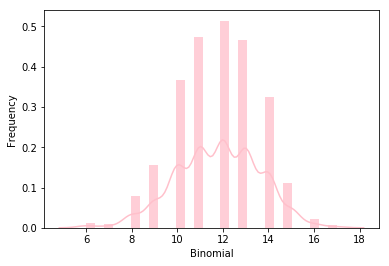

In [140]:
import seaborn
from scipy.stats import binom
data=binom.rvs(n=17,p=0.7,loc=0,size=1010)
ax=seaborn.distplot(data,
                kde=True,
                color='pink',
                hist_kws={"linewidth": 22,'alpha':0.77})
ax.set(xlabel='Binomial',ylabel='Frequency')
plt.show()

[4 4 4 ... 5 7 6]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


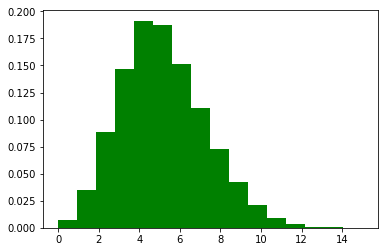

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


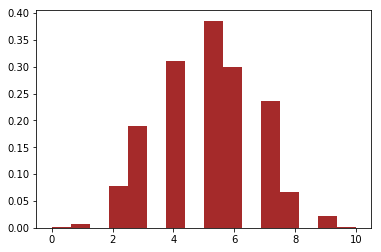

In [239]:
import numpy as np
import matplotlib.pyplot as plt
s= np.random.poisson(5, 10000)
print(s)
plt.hist(s,16,normed=True, color='green')
plt.show()
s1 = np.random.binomial(10,0.5,1000)
plt.hist(s1,16,normed=True, color="Brown",)
plt.show()

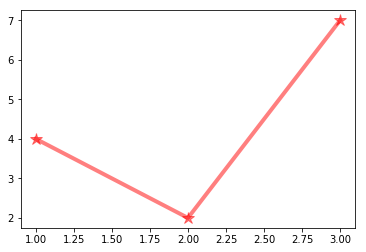

In [260]:
plt.plot([1,2,3],[4,2,7], linewidth=4,c='r',alpha=0.5,marker='*', markersize=13.0)
plt.show()

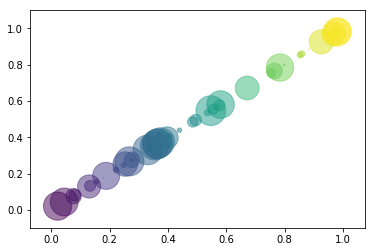

In [271]:
x=y= color=np.random.rand(50)
size = (30* np.random.rand(50))**2
plt.scatter(x,y,s = size, c=color, alpha=0.5)
plt.show()

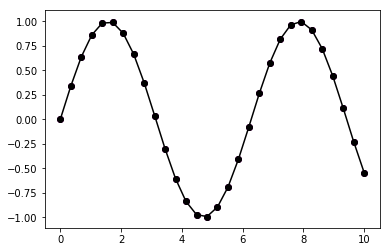

In [281]:
from scipy import sin
x = np.linspace(0,10,30)
y =np.sin(x)
plt.scatter(x,y, color='purple')
plt.plot(x,y,'-ok')
plt.show()

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8]


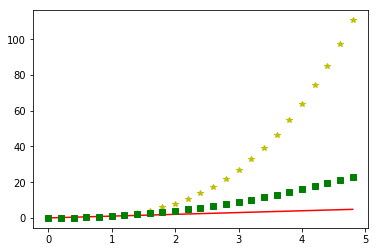

In [227]:
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(0,5,0.2)
print(t)
plt.plot(t,t,'r-',t,t**3,'y*',t,t**2,'gs')
plt.show()

In [283]:
a = np.random.randn(50)
b = np.random.randint(0,50,50)
c = np.arange(50)
print(a)
print(b)
print(c)

[-1.28398153 -0.42591935 -0.99822835  0.33953466 -0.29961533  0.47330003
  1.07350286  2.04766294 -0.11589448 -0.19885725 -0.37549737  0.54647774
  0.22738839 -0.07807786 -0.55298032  0.05316922  2.3292357  -0.76100747
  0.11193016  0.25271448  0.94329559 -0.31046819 -0.99395282 -0.36055466
  1.04542597 -0.89907726  0.15924365 -0.25134356 -0.09529863 -0.98649148
 -0.81400644 -1.51060682 -0.83558035  0.8847419  -0.03566897  0.46244318
  0.82606236  0.58148353  1.18336801 -0.11430827 -1.19919111  0.65186176
 -0.06556326  2.3947677  -1.49551812  0.83657695  0.02236459 -0.26760912
  0.36534533 -0.51523254]
[15 35 46 18 41 45 24 40  9  2 21  8 20 19 13 33 18 22 14 19 40 34 33  2
 26  3 18 12 32 32 40  8 48 29 49 24 25 46 45 22 32 38 45 29 49  1 45 24
 29  7]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


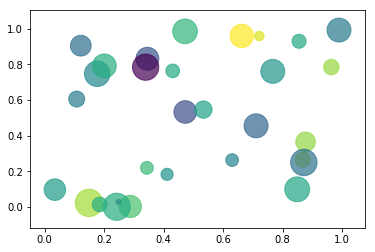

In [289]:
x = np.random.rand(30)
y = np.random.rand(30)
z = np.random.rand(50)
color = np.random.randn(30)
plt.scatter(x,y,s=z*777,c = color,alpha=0.7)
plt.show()

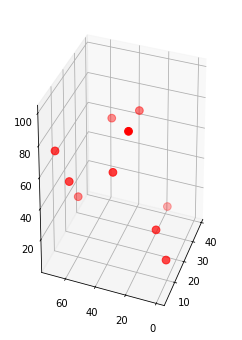

<Figure size 432x288 with 0 Axes>

In [313]:
from mpl_toolkits.mplot3d import Axes3D
x = np.random.randint(0,40,10)
y = np.random.randint(0,80,10)
z = np.random.randint(0,100,10)
fg =plt.figure(1,figsize=(9,6))
ax =fg.add_subplot(121, projection='3d')
ax.scatter(x,y,z,s=60,c='r')
ax.view_init(27,200)
plt.show()
plt.savefig('3d.pdf',format='pdf')

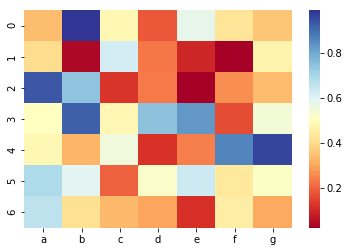

In [333]:
import seaborn as sn
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.random((7,7)),columns=['a','b','c','d','e','f','g'])
# sn.heatmap(df, annot =True, annot_kws = {'size':7}, linewidth=2, linecolor ='pink', xticklabels=2)
sn.heatmap(df,cmap='RdYlBu')
import matplotlib.pyplot as plt
plt.show()

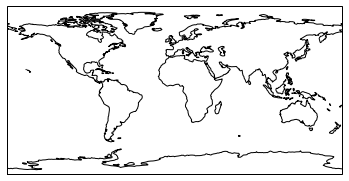

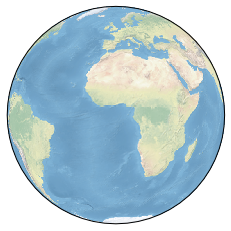

In [353]:
import cartopy.crs as ccrs
plt.figure()

ax =plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
plt.show()
ax2 =plt.axes(projection =ccrs.Orthographic())
# ax2 =plt.axes(projection = ccrs.AlbersEqualArea())
ax2.stock_img()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x0000015B2BB752B0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
C:\ProgramData\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x0000015B2BB752B0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


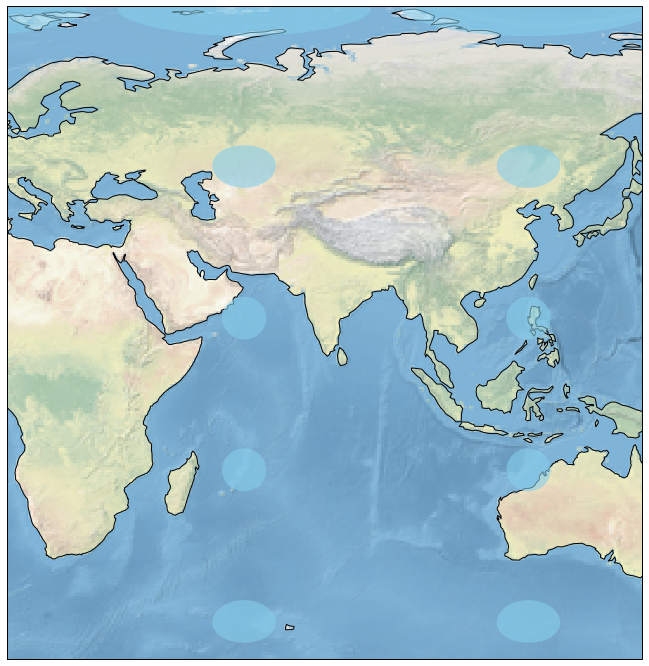

In [359]:
fig=plt.figure(figsize=(16,12))
ax=fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent((10,144,70,-30))
ax.stock_img()
ax.coastlines()
ax.tissot(facecolor='skyblue',alpha=0.6)
plt.show()